# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 2.24
Członkowie: Jakub Milasz 414584, Miłosz Pabis 417356, Bartosz Pietrucha 414678

---

# Zestaw zadań 3: Rozkłady zmiennych losowych wielowymiarowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_2d_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca nazwy kolumn z wariantami pierwszej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. x),
        indeks z wariantami drugiej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. y),
        a wartości w tablicy są prawdopodobieństwami poszczególnych wariantów zmiennej.
    cdf: pandas.DataFrame
        Tablica zawierająca nazwy kolumny w formacie pandas.IntervalIndex z przedziałami wartości pierwszej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. x),
        indeks w formacie pandas.IntervalIndex z przedziałami wartości drugiej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. y),
        a wartości w tablicy są wartościami dystrybuanty dla poszczególnych przedziałów.
    mask: numpy.ndarray
        Macierz logiczna 2D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta dwuwymiarowej zmiennej losowej dyskretnej")

    if mask is None:
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, linewidths=2, linecolor='grey', ax=axes[0])
    else:
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, annot_kws={'color':'darkgreen'}, linewidths=2, linecolor='grey', mask=~mask, ax=axes[0])
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, annot_kws={'color':'red'}, linewidths=2, linecolor='grey', mask=mask, cbar=False, ax=axes[0])
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].tick_params(labelrotation=0)

    sns.heatmap(data=cdf, vmin=0, vmax=1, cmap="Blues", annot=True, linewidths=2, linecolor='grey', ax=axes[1])
    axes[1].set_title("Dystrybuanta")
    axes[1].tick_params(labelrotation=45)


### Dane do zadań

Pliki r1p.pkl oraz r1f.pkl zawierają funkcję rozkładu prawdopodobieństwa oraz dystrybuantę przykładowej dwywymiarowej zmiennej losowej dyskretnej.

W celu wczytania danych do notatnika umieść pliki w tym samym folderze, w którym znajduje się notatnik.

In [4]:
r1p = pd.read_pickle("r1p.pkl")
r1p

x,1,2,3,4
y,,,,
0,0.060,0.100,0.160,0.080
5,0.018,0.030,0.048,0.024
10,0.027,0.045,0.070,0.028
15,0.045,0.075,0.120,0.070


In [5]:
r1f= pd.read_pickle("r1f.pkl")
r1f

x,"[-inf, 1.0)","[1.0, 2.0)","[2.0, 3.0)","[3.0, 4.0)","[4.0, inf)"
y,,,,,
"[-inf, 0.0)",0.0,0.000,0.000,0.000,0.00
"[0.0, 5.0)",0.0,0.060,0.160,0.320,0.40
"[5.0, 10.0)",0.0,0.078,0.208,0.416,0.52
"[10.0, 15.0)",0.0,0.105,0.280,0.558,0.69
"[15.0, inf)",0.0,0.150,0.400,0.798,1.00


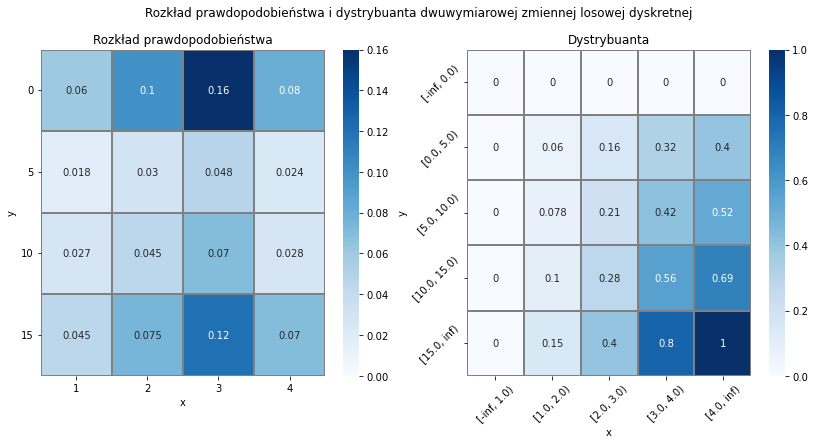

In [6]:
vizualize_2d_discrete_distribution(r1p, r1f)

### Zadanie 1: Przykładowy dwuwymiarowy dyskretny rozkład prawdopodobieństwa [17 pkt]

Bazując na wczytanym do notatnika przykładowym dwuwymiarowym rozkładzie prawdopodobieństwa oblicz jego rozkłady brzegowe, wybrane rozkłady warunkowe oraz podstawowe parametry rozkładu.

#### a) Rozkłady brzegowe

Przedstaw funkcje brzegowych rozkładów prawdopodobieństwa zmiennej losowej dwuwymiarowej X, Y w formie tablic `r1bx`  i `r1by` o następującej strukturze:

Tablica `r1bx`:
> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny: </br>
> P(X=x) - prawdopodobieństwa rozkładu brzegowego zmiennej X.

Tablica `r1by`:
> Indeks:</br>
> y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny: </br>
> P(Y=y) - prawdopodobieństwa rozkładu brzegowego zmiennej Y.

In [7]:
r1bx = pd.DataFrame(data=r1p.sum(), index=r1p.columns, columns=["P(X=x)"])
r1bx.index.name = "x"

r1bx

,P(X=x)
x,
1,0.150
2,0.250
3,0.398
4,0.202


In [8]:
# Komórka testowa
assert type(r1bx) == pd.DataFrame
assert r1bx.shape == (4, 1)
assert list(r1bx.columns) == ["P(X=x)"]
assert r1bx.index.name == 'x'
assert np.isclose(np.sum(r1bx.index.values), 10)
assert np.isclose(np.sum(r1bx["P(X=x)"]), 1)

In [9]:
r1by = pd.DataFrame(data=r1p.sum(axis=1), index=r1p.index, columns=["P(Y=y)"])
r1by.index.name = "y"

r1by

,P(Y=y)
y,
0,0.40
5,0.12
10,0.17
15,0.31


In [10]:
# Komórka testowa
assert type(r1by) == pd.DataFrame
assert r1by.shape == (4, 1)
assert list(r1by.columns) == ["P(Y=y)"]
assert r1by.index.name == 'y'
assert np.isclose(np.sum(r1by.index.values), 30)
assert np.isclose(np.sum(r1by["P(Y=y)"]), 1)

#### b) Przykładowe rozkłady warunkowe

Przedstaw funkcje przykładowych warunkowych rozkładów prawdopodobieństwa zmiennej losowej dwuwymiarowej X, Y w formie tablic `r1wx`  i `r1wy` o następującej strukturze:

Tablica `r1wx`:
> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny: </br>
> P(X=x|Y=5) - prawdopodobieństwa rozkładu warunkowego P(X=x|Y=5) zmiennej X.

Tablica `r1wy`:
> Indeks:</br>
> y- warianty przyjmowane przez zmienną Y.</br>

> Kolumny: </br>
> P(Y=y|X=2) - prawdopodobieństwa rozkładu warunkowego P(Y=y|X=2) zmiennej Y.

In [11]:
# Rozkład warunkowy X

d = r1p.loc[5, :]
PXY5 = d / d.sum()

r1wx = pd.DataFrame(data=PXY5.values, index=PXY5.index, columns=["P(X=x|Y=5)"])
r1wx.index.name = "x"
r1wx

,P(X=x|Y=5)
x,
1,0.15
2,0.25
3,0.40
4,0.20


In [12]:
# Komórka testowa
assert type(r1wx) == pd.DataFrame
assert r1wx.shape == (4, 1)
assert list(r1wx.columns) == ["P(X=x|Y=5)"]
assert r1wx.index.name == 'x'
assert np.isclose(np.sum(r1wx.index.values), 10)
assert np.isclose(np.sum(r1wx["P(X=x|Y=5)"]), 1)

In [13]:
# Rozkład warunkowy Y
d = r1p.loc[:, 2]
PX2Y = d / d.sum()

r1wy = pd.DataFrame(data=PX2Y.values, index=PX2Y.index, columns=["P(Y=y|X=2)"])
r1wy.index.name = "y"
r1wy

,P(Y=y|X=2)
y,
0,0.40
5,0.12
10,0.18
15,0.30


In [14]:
# Komórka testowa
assert type(r1wy) == pd.DataFrame
assert r1wy.shape == (4, 1)
assert list(r1wy.columns) == ["P(Y=y|X=2)"]
assert r1wy.index.name == 'y'
assert np.isclose(np.sum(r1wy.index.values), 30)
assert np.isclose(np.sum(r1wy["P(Y=y|X=2)"]), 1)

#### c) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej dwuwymiarowej X, Y - wartość średnia (`r1_mean`), wariancja(`r1_var`), odchylenie standardowe (`r1_std`), kowariancję (`r1_cov`) oraz współczynnik korelacji (`r1_r`).

In [15]:
# Wartość oczekiwana
r1_mean = np.sum(np.sum(r1p * np.atleast_2d(r1p.index).T * r1p.columns))
r1_mean


18.505

In [16]:
# Wariancja
mean_x = np.sum(r1bx.values.T * r1bx.index.values)
mean_x

mean_y = np.sum(r1by.values.T * r1by.index.values)
mean_y

row = (r1p.columns - mean_x)**2
col = np.atleast_2d((r1p.index - mean_y)**2).T

r1_var = np.sum((r1p * col * row).values)
r1_var


38.96800412

In [17]:
# Odchylenie standardowe
r1_std = np.sqrt(r1_var)
r1_std

6.242435752172384

In [18]:
# Kowariancja
rowK = (r1p.columns - mean_x)
colK = np.atleast_2d((r1p.index - mean_y)).T

r1_cov = np.sum((r1p * colK * rowK).values)
r1_cov


0.07360000000000022

In [19]:
# Współczynnik korelacji
std_x =  np.sqrt(np.sum((r1bx.index.values - mean_x)**2 * r1bx.values.T))
std_x

std_y = np.sqrt(np.sum((r1by.index.values - mean_y)**2 * r1by.values.T))
std_y

r1_r = r1_cov / (std_x * std_y)
r1_r

0.011848900761810917

In [20]:
# Komórka testowa
assert np.isclose(r1_mean, 18.505)
assert np.isclose(r1_var, 38.96800412)
assert np.isclose(r1_std, 6.242435752172384)
assert np.isclose(r1_cov, 0.07360000000000022)
assert np.isclose(r1_r, 0.011848900761810917)

### Zadanie 2: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]

Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>2, 0<Y<=10)
- P(X<=2|X>3, Y>=5)

Wyniki zapisz kolejno do zmiennych `p1` i `p2`oraz przedstaw na wykresach korzystając z funkcji `vizualize_2d_discrete_distribution()`.

#### a) P(X>2, 0<Y<=10)

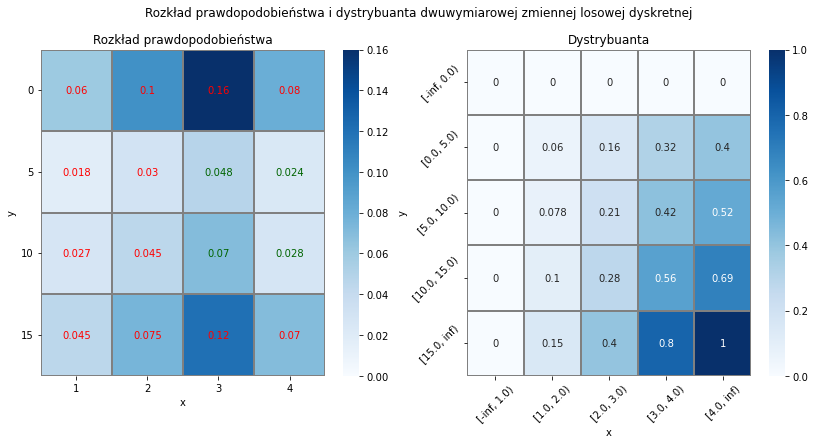

In [21]:
maskA = (r1p.columns > 2) & np.atleast_2d(( (r1p.index > 0) & (r1p.index <= 10) )).T

PMA = r1p.values[maskA]

p1 = PMA.sum()

vizualize_2d_discrete_distribution(r1p, r1f, maskA)

In [22]:
# Komórka testowa
assert np.isclose(p1, 0.17)

#### b) P(X<=2|X>3, Y>=5)

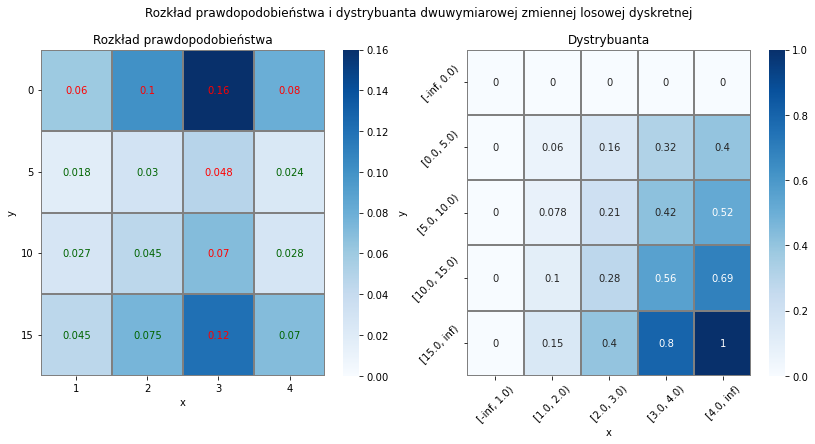

In [23]:
maskB = np.atleast_2d(( r1p.index >= 5 )).T & ( ( r1p.columns <=2 ) | ( r1p.columns > 3 ) )

PMB = r1p.values[maskB]

p2 = PMB.sum()

vizualize_2d_discrete_distribution(r1p, r1f, maskB)

In [24]:
# Komórka testowa
assert np.isclose(p2, 0.362)

### Zadanie 4: Niezależność zmiennych losowych [2 pkt]

Sprawdź, czy zmienne losowe X i Y są zmiennymi niezależnymi i zapisz wynik testu (True/False) do zmiennej `test`.

In [25]:
test = (r1p.values == r1bx.values * r1by.values.T).all()
test

False

In [26]:
# Komórka testowa
assert test==False